Nama: Bening Maulina Fittamami;
email: beningmaulina@gmail.com 

---

Kelas Belajar Mesin Learning Untuk Pemula (Submission 1);
Digital Talent Scholarship Kominfo

---


In [39]:
print('Bening Maulina Fittamami; Kelas Dicoding Belajar Mesin Learning Untuk Pemula(Submission 1); Digital Talent Scholarship Kominfo')

Bening Maulina Fittamami; Kelas Dicoding Belajar Mesin Learning Untuk Pemula(Submission 1); Digital Talent Scholarship Kominfo


In [40]:
# Mendownload file rockpaperscissors
!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-06-25 14:39:15--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  7.00MB/s    in 63s     

2021-06-25 14:40:19 (4.92 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [41]:
# Mengunzip file
!unzip rockpaperscissors.zip

Streaming output truncated to the last 5000 lines.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6

In [42]:
!pip install split-folders

In [43]:
import splitfolders

In [44]:
# Dataset training dan testing
import os
import tensorflow as tf

In [46]:
rock_dir = "/content/rockpaperscissors/rps-cv-images"

In [47]:
splitfolders.ratio('/content/rockpaperscissors/rps-cv-images', output = '/content/rockpaperscissors/output', seed = 24, ratio = (0.6, 0.4), group_prefix=None )

Copying files: 2188 files [00:00, 3447.04 files/s]


In [48]:
# Import Data Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [49]:
# Training dan Validation Data
train_generator = train_datagen.flow_from_directory(
          '/content/rockpaperscissors/output/train',  
           target_size=(150, 150), 
           batch_size=32,
           class_mode='categorical') #menggunakan class mode categorical karena kalsifikasi lebih dari 2 kelas
     
validation_generator = test_datagen.flow_from_directory(
            '/content/rockpaperscissors/output/val', 
            target_size=(150, 150), 
            batch_size=32, 
            class_mode='categorical')#menggunakan class mode categorical karena kalsifikasi lebih dari 2 kelas

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [51]:
# Model Sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [54]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [55]:
model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2
)

Epoch 1/30
25/25 - 36s - loss: 0.6309 - accuracy: 0.4062 - val_loss: 0.5662 - val_accuracy: 0.6062
Epoch 2/30
25/25 - 35s - loss: 0.4366 - accuracy: 0.7188 - val_loss: 0.3399 - val_accuracy: 0.8125
Epoch 3/30
25/25 - 35s - loss: 0.2439 - accuracy: 0.8675 - val_loss: 0.2370 - val_accuracy: 0.9062
Epoch 4/30
25/25 - 35s - loss: 0.1430 - accuracy: 0.9325 - val_loss: 0.1186 - val_accuracy: 0.9250
Epoch 5/30
25/25 - 35s - loss: 0.1380 - accuracy: 0.9375 - val_loss: 0.2219 - val_accuracy: 0.8875
Epoch 6/30
25/25 - 35s - loss: 0.1174 - accuracy: 0.9438 - val_loss: 0.1624 - val_accuracy: 0.9062
Epoch 7/30
25/25 - 35s - loss: 0.1110 - accuracy: 0.9475 - val_loss: 0.0598 - val_accuracy: 0.9750
Epoch 8/30
25/25 - 35s - loss: 0.0744 - accuracy: 0.9625 - val_loss: 0.1082 - val_accuracy: 0.9563
Epoch 9/30
25/25 - 35s - loss: 0.0861 - accuracy: 0.9663 - val_loss: 0.1959 - val_accuracy: 0.9125
Epoch 10/30
25/25 - 35s - loss: 0.0806 - accuracy: 0.9588 - val_loss: 0.1396 - val_accuracy: 0.9312
Epoch 11/

Saving 1Io5Ksm3bqy87EAU.png to 1Io5Ksm3bqy87EAU (1).png


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


1Io5Ksm3bqy87EAU.png
scissors


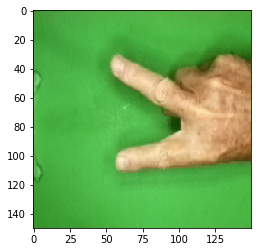

In [66]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
     
uploaded = files.upload()
     
for fn in uploaded.keys():

 path = fn
     
# predicting images
img = image.load_img(path, target_size=(150,150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
     
images = np.vstack([x])
result = model.predict_classes(images)[0]
classes = model.predict(images, batch_size=10)
print(fn)
if classes[0,0]!=0:
    print('paper')
elif classes[0,1]!=0:
    print('rock')
else:
    print('scissors')